# UNCW Campus Crimes Analysis
The below analysis will review the campus crimes at UNCW to determine the unique number of cases, the different type of cases, when most crime cases occur, and plotting various visualizations to communicate this information.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Load and review the data

In [2]:
campus = pd.read_csv('data/UncwPDdata.csv')
campus.head()

,Case Number,Date Occurred,Date Reported,Type,Location,Disposition,Description
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited an..."
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed f...
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alc...
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited an..."


### Number of cases?
The below output indicates there are a 3,504 unique cases. This is identified by using the unique cases number. By dropping duplicates the number of unique cases is obtainable.

In [3]:
campus.drop_duplicates(subset=['Case Number']).count

<bound method DataFrame.count of      Case Number               Date Occurred     Date Reported  \
0      201901027             11/18/2019 2:36   11/18/2019 2:37   
1      201901024            11/16/2019 23:16  11/16/2019 23:17   
2      201901023            11/16/2019 13:38  11/16/2019 14:12   
3      201901021             11/16/2019 2:47   11/16/2019 2:48   
4      201901020             11/16/2019 2:20   11/16/2019 2:21   
...          ...                         ...               ...   
3794   201300331             4/14/2013 21:11   4/14/2013 21:11   
3990   201300229             3/13/2013 22:49   3/13/2013 22:49   
3991   201300230             3/13/2013 22:49   3/13/2013 22:49   
4130   201300152             2/14/2013 12:50   2/14/2013 12:50   
4323   201300014  01/09/2013 9:30 - 11:45 AM    1/9/2013 17:00   

                   Type                  Location            Disposition  \
0                   DWI  5100 Block Randall Drive                 Closed   
1     Alcohol Violatio

Going forward, duplicate case numbers will be dropped.

In [4]:
# create new dataframe with unique cases
camcrime = campus.drop_duplicates(subset=['Case Number'])
camcrime.head()

,Case Number,Date Occurred,Date Reported,Type,Location,Disposition,Description
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited an..."
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed f...
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alc...
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited an..."


## Review Different Crime Types

Applying the pandas function .value_counts() will provide the number of crime types. The below indicates the top three crime types are larceny, alcohol violations, and drug violations. The latter two are not very surprising, as it is common for college aged students to drink and use drugs. One crime type that stands out is other offense, given it is a very broad type.

In [5]:
camcrime['Type'].value_counts()

Larceny                    1353
Alcohol Violation           490
Drug Violation              481
DWI                         342
Vandalism                   186
Other Offense               137
Simple Assault               79
Weapons Violation            60
Sex Offense                  59
Harassment                   45
Burglary                     45
Trespass                     38
Communicating Threats        34
Disorderly Conduct           29
Stalking                     28
Hit and Run                  14
Motor Vehicle Theft          13
Other Assault                12
Aggravated Assault           11
Dating Violence               8
Other                         8
Motor Vehicle Collision       6
Drug Law Referral             5
Traffic Violation             5
Arson                         5
Drug Law Arrest               4
Domestic Violence             3
Robbery                       2
Hate Crimes                   2
Fraud/Forgery                 1
Name: Type, dtype: int64

As noted above, larceny is the most report case. UNCW tends to have an issue with stolen bikes, so next the number of larceny cases related to bikes will be reviewed.

In [6]:
Bikes = camcrime[(camcrime['Type'] == 'Larceny') & (camcrime['Description'].str.contains('bicycle' or 'Bicycle'))]
Bikes.shape

(697, 7)

697 cases are related to bikes - demonstrating UNCW has a big issue with bikes being stolen.

Next, cases with type as "Other" will be reviewed. The **full** descriptions will be shown to review these. 

In [7]:
Other = camcrime[(camcrime['Type'] == 'Other')]
pd.set_option('max_colwidth', None)
Other[['Case Number', 'Description']].head(8)

,Case Number,Description
677,201800662,A non-student was arrested by a NHC Deputy Sheriff after a high speed vehicle pursuit which ended on campus. Numerous traffic and other charges were filed against the arrested person.
3332,201301283,A non-university member was trespassed for attempted larceny of a bicycle and disorderly conduct.
3468,201300980,A person reported being slapped on the buttocks by a male riding by on a bicycle.
3469,201300979,A person reported being slapped on the buttocks by a male riding by on a bicycle.
3470,201300976,Two resident students were referred for making unauthorized entry into the room of another student. Investigation revealed there was an agreement between the students that they could access each others' rooms.
3509,201300916,"During a traffic stop, the driver was found to be in possession of fraudulent ID."
3511,201300914,A subject activated the emergency call box and ran from the scene.
3568,201300492,OCA #201300492 - Subjects peeping into window of females' room.


It appears most of the crimes being put under the Other crime type are reasonable, with the exception of one. Case Number 201301283 contains disorderly conduct in its description, so one may think that would be the crime type it is classified as.

## Plot Different Crime Types

Next, a bar chart of the different crime types will be plotted.

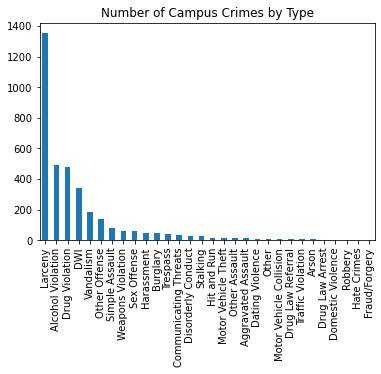

In [8]:
%matplotlib inline

plt.figsize=(20,12)

crime_count = camcrime['Type'].value_counts()
crime_count

plt.title('Number of Campus Crimes by Type')
crime_count.plot.bar(crime_count);

## Extract Date of Cases

The date of when cases occurred will be extracted next. A new column "Date" will be added to the dataset by extracting the MM/DD/YYYY pattern from "Date Occurred" column.

Note: The "Date Occurred" will not be converted to a datetime data type given this dataset was most populated manually.

In [9]:
camcrime = camcrime.rename(columns={'Date Occurred':'Date_Occurred'})
camcrime.head()

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations."
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation."


In [10]:
# Utilize regex patterns to extract year, month, and day from the date_occurred column
camcrime['Date'] = camcrime.Date_Occurred.str.extract(r'(\d{1,2}/\d{1,2}/\d{2,4})')
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.,11/16/2019
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019
...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013


Some rows cannot extract MM/DD/YYYY pattern from the "Date Occurred" column; thus, theses records will be dropped.

In [11]:
camcrime['Date'].isnull().values.sum()

29

In [12]:
camcrime = camcrime.dropna(subset=['Date'])
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.,11/16/2019
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019
...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013


### Create Year Column

From the Date column, extract the year (some records use two digits for year instead of four, for example, 7/10/13).

In [13]:
camcrime['Year'] = camcrime.Date.str.extract(r'(\d{2}$)')
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019,19
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019,19
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.,11/16/2019,19
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019,19
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019,19
...,...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013,13
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013,13
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013,13
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013,13


### Limit data from year 2012-2019.

In [14]:
camcrime['Year'] = camcrime['Year'].astype(float)

In [15]:
camcrime = camcrime[(camcrime['Year'] <= 19) & (camcrime['Year'] >= 12)]
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019,19.0
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019,19.0
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,5009 Riegel Rd,Further Investigation,A report of damage to state property was made.,11/16/2019,19.0
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019,19.0
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019,19.0
...,...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013,13.0
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013,13.0
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013,13.0
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013,13.0


## Locations
Next, the different locations from thelocation column will be reviewed by using .value_counts().

In [16]:
camcrime['Location'].value_counts()

5009 Riegel Rd (Galloway Hall)                 104
5100 blk of Randall Dr                          50
5100 Block Randall Dr                           50
5061 Riegel Rd (Graham Hall)                    49
5162 Randall Dr (Randall Library)               47
                                              ... 
925 Community Dr.                                1
965 Reynolds Drive (SHC # 3)                     1
1100 Walon Dr                                    1
1299 Walton Drive                                1
5130 Seahawk Landing Dr (Seahawk Landing 7)      1
Name: Location, Length: 1361, dtype: int64

Based on campus PD knowledge, a list was created which group specific addresses into general areas.

In [17]:
# Address groups
galloway = ['5009 Riegel Rd (Galloway Hall)', '5009 Riegel Rd', '5009 Riegel Rd (Galloway)', '5009 Riegel Rd ',
            '5009 Riegel Road (Galloway Hall)', '5009 Riegel Road']
campusentry= ['5100 Block Randall Dr', '5100 blk Randall Dr', '5100 Block Randall Drive', '5100 Blk Randall Dr', 
              '5100 blk of Randall Dr', '5100 blk of Randall Dr.', '5138 Randall Drive']
lib = ['5162 Randall Dr (Randall Library)', '5162 Randall Drive (Randall Library)', '5162 Randall Drive', 
       '5162 Randal Rd. (Randall Library)']
grahamhew= ['5061 Riegel Rd (Graham Hall)', '5065 Riegel Rd (Hewlett Hall)', '5055 Riegel Rd (Hewlett Hall)']
wag = ['5151 Suite Service Loop (Wagoner Hall)', '5151 Suite Service Lp (Wagoner Hall)', '5151 Suite Service LP (Wagoner Hall)']

### Map general locations to addresses within the dataframe

The mapping below will be used to map the locations in the lists defined above to the "standard" location names:
- galloway: 'Galloway Hall'
- campusentry: 'Randall Drive Entrance'
- lib: 'Randall Library'
- grahamhew: 'Graham-Hewlett Hall'
- wag: 'Wagoner Hall'

In [18]:
camcrime['Location'] = camcrime['Location'].replace([galloway], 'Galloway Hall')
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019,19.0
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019,19.0
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,Galloway Hall,Further Investigation,A report of damage to state property was made.,11/16/2019,19.0
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019,19.0
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,5100 Block Randall Drive,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019,19.0
...,...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013,13.0
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013,13.0
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013,13.0
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013,13.0


In [22]:
camcrime['Location'] = camcrime['Location'].replace([campusentry], 'Randall Drive Entrance')
camcrime['Location'] = camcrime['Location'].replace([lib], 'Randall Library')
camcrime['Location'] = camcrime['Location'].replace([grahamhew], 'Graham-Hewlett Hall')
camcrime['Location'] = camcrime['Location'].replace([wag], 'Wagoner Hall')
camcrime

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,Randall Drive Entrance,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019,19.0
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019,19.0
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,Galloway Hall,Further Investigation,A report of damage to state property was made.,11/16/2019,19.0
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019,19.0
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,Randall Drive Entrance,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019,19.0
...,...,...,...,...,...,...,...,...,...
3794,201300331,4/14/2013 21:11,4/14/2013 21:11,Burglary,5021 Cahill Dr.,Other,Keys and purse reported taken.,4/14/2013,13.0
3990,201300229,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of an Xbox.,3/13/2013,13.0
3991,201300230,3/13/2013 22:49,3/13/2013 22:49,Burglary,Graham Hall,Closed,Larceny of a Xbox controller.,3/13/2013,13.0
4130,201300152,2/14/2013 12:50,2/14/2013 12:50,Other Assault,Intramural Fields,Referred,OCA# 201300152-Assault.,2/14/2013,13.0


Review the value counts of the locations again.

In [23]:
camcrime['Location'].value_counts()

Galloway Hall                                  222
Randall Drive Entrance                         168
Randall Library                                 85
Graham-Hewlett Hall                             81
Wagoner Hall                                    42
                                              ... 
Randall Dr/ Racine Dr                            1
925 Community Dr.                                1
965 Reynolds Drive (SHC # 3)                     1
1100 Walon Dr                                    1
5130 Seahawk Landing Dr (Seahawk Landing 7)      1
Name: Location, Length: 1343, dtype: int64

### Review Galloway Hall Cases

Generally speaking, Galloway Hall represents on-campus housing for UNCW. The below output indicates crime types between Galloway Hall and campus-wide case types are similar; however, one key difference that stands out is that there are no DWI case types for Galloway Hall. This is logical given students who live on-campus are less likely to drive after a night out.

In [24]:
Galloway = camcrime.loc[camcrime['Location'] == 'Galloway Hall']
Galloway

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,Galloway Hall,Further Investigation,A report of damage to state property was made.,11/16/2019,19.0
15,201900983,11/6/2019 12:00,11/6/2019 22:23,Simple Assault,Galloway Hall,Closed,One non-university member was trespassed for simple assault.,11/6/2019,19.0
24,201900968,11/3/2019 20:00,11/3/2019 20:08,Larceny,Galloway Hall,Closed,A report of larceny of personal property was made.,11/3/2019,19.0
48,201900924,10/16/2019 1:00,10/25/2019 21:41,Communicating Threats,Galloway Hall,Referred,A resident student was referred for threatening a university resident adviser.,10/16/2019,19.0
56,201900902,10/20/2019 2:55,10/20/2019 2:56,Alcohol Violation,Galloway Hall,Referred,A resident student was cited and referred for alcohol violations.,10/20/2019,19.0
...,...,...,...,...,...,...,...,...,...
3402,201301154,10/20/2013 5:29,10/20/2013 5:30,Weapons Violation,Galloway Hall,Referred,Subject was issued university citation for weapons violation (daggar).,10/20/2013,13.0
3460,201300992,9/16/2013 19:43,9/16/2013 19:45,Communicating Threats,Galloway Hall,Referred,Two resident students were referred for communicating threats against each other.,9/16/2013,13.0
3502,201300931,8/29/13 12:00 PM - 8/30/13 10:00 AM,8/30/2013 10:14,Larceny,Galloway Hall,Unfounded,A bicycle secured with a cable lock was reported stolen.,8/29/13,13.0
3505,201300923,5/5/13 8:00 Am - 8/28/13 9:22 AM,8/28/2013 10:22,Larceny,Galloway Hall,Closed,A bicycle secured with a U-bolt was reported stolen.,5/5/13,13.0


In [25]:
Galloway['Type'].value_counts()

Larceny                  66
Alcohol Violation        60
Drug Violation           46
Other Offense            13
Vandalism                10
Simple Assault            8
Communicating Threats     3
Harassment                3
Burglary                  3
Weapons Violation         3
Sex Offense               2
Disorderly Conduct        2
Other Assault             1
Trespass                  1
Arson                     1
Name: Type, dtype: int64

## Create a Plotting Function

The below function will take a dataframe and a type of crime (as a string) as arguments to produce line plots by year.

In [26]:
def plotting(df, crime):
    df = camcrime[camcrime.Type == crime]
    df = df.groupby('Year')[['Case Number']].count()
    
    plt.plot(df.index, df['Case Number'])
    plt.xlabel('Year')
    plt.ylabel(crime + ' '+ 'Occurrence')
    plt.title(crime + ' ' + 'at UNCW by Year')
    
    return plt.show()


### Apply Function

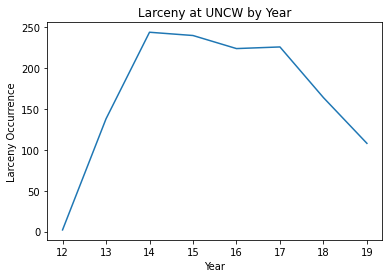

In [28]:
plotting(camcrime, 'Larceny')

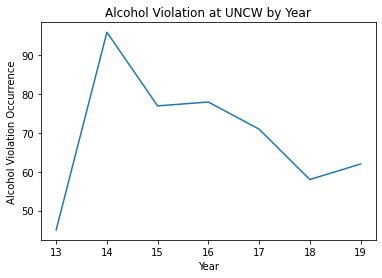

In [29]:
plotting(camcrime, 'Alcohol Violation')

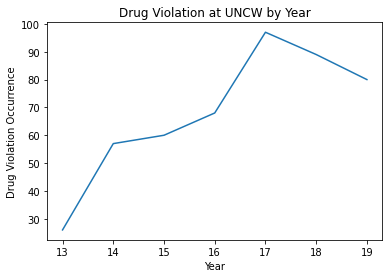

In [30]:
plotting(camcrime, 'Drug Violation')

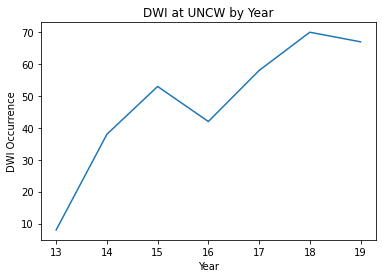

In [31]:
plotting(camcrime, 'DWI')

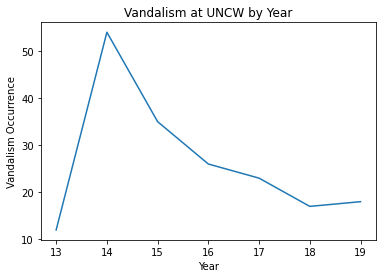

In [32]:
plotting(camcrime, 'Vandalism')

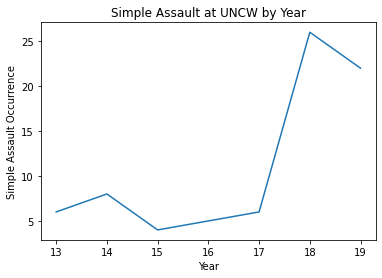

In [33]:
plotting(camcrime, 'Simple Assault')

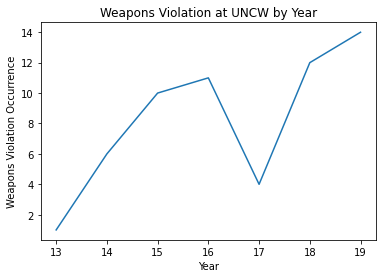

In [34]:
plotting(camcrime, 'Weapons Violation')

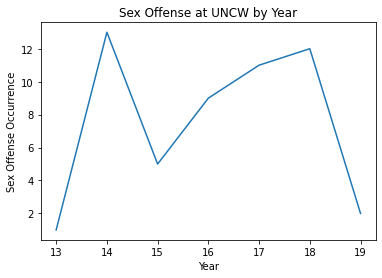

In [35]:
plotting(camcrime, 'Sex Offense')

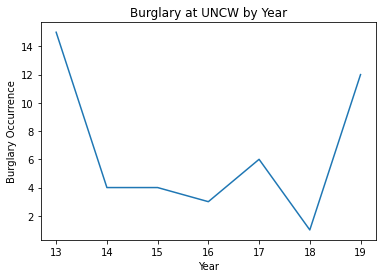

In [36]:
plotting(camcrime, 'Burglary')

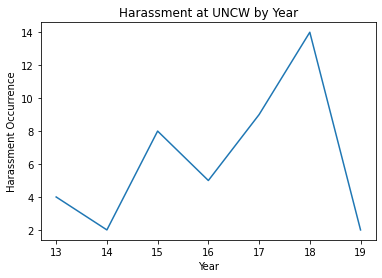

In [37]:
plotting(camcrime, 'Harassment')

## Analyze Violent vs Non-Violent
The below list will represent violent crime case types:
- Simple Assault
- DWI
- Sex Offense
- Harrassment
- Communicating Threats
- Hit and Run
- Other Assault
- Aggravated Assault
- Dating Violence
- Motor Vehicle Collision
- Domestic Violence
- Hate Crimes


This list will be used to only include the violent cases on campus make those records a dataframe.

In [38]:
violent_crimes = ['Simple Assault','DWI','Sex Offense','Harrassment','Communicating Threats','Hit and Run','Other Assault',
                  'Aggravated Assault','Dating Violence','Motor Vehicle Collision','Domestic Violence','Hate Crimes']

violent_crimes_df = camcrime[camcrime['Type'].isin(violent_crimes)]
violent_crimes_df.head()

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
0,201901027,11/18/2019 2:36,11/18/2019 2:37,DWI,Randall Drive Entrance,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and moving violations.",11/18/2019,19.0
4,201901020,11/16/2019 2:20,11/16/2019 2:21,DWI,Randall Drive Entrance,Closed,"A non-university member was arrested, cited and trespassed for driving while impaired and a moving violation.",11/16/2019,19.0
15,201900983,11/6/2019 12:00,11/6/2019 22:23,Simple Assault,Galloway Hall,Closed,One non-university member was trespassed for simple assault.,11/6/2019,19.0
28,201900970,10/31/2019 12:10,11/1/2019 9:01,Simple Assault,DC Virgo,Referred,"Three DC Virgo Students were referred to the 'Element' Juvenile Diversion Program for fighting. Also, a forth student was suspended for 1 day for fighting.",10/31/2019,19.0
40,201900933,10/27/2019 23:49,10/27/2019 23:48,DWI,Randall Drive Entrance,Closed,A non-university member was cited for driving after consuming under 21 and a moving violation.,10/27/2019,19.0


### Visualize Yearly Trend of Violent Cases
A function will be used to create this visual.

In [ ]:
def plotting1(df, crimes):
    df = df.groupby('Year')[['Case Number']].count()
    
    plt.plot(df.index, df['Case Number'])
    plt.xlabel('Year')
    plt.ylabel(crimes + ' ' + 'Occurances')
    plt.title(crimes + ' ' + 'Cases at UNCW by Year')
    
    return plt.show()

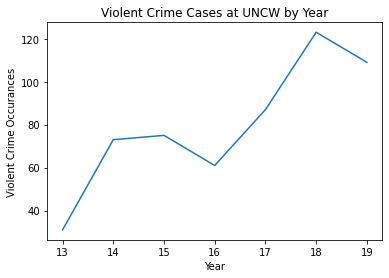

In [34]:
plotting1(violent_crimes_df, violent_crimes)

In [41]:
# total number of violent cases
violent_crimes_df['Type'].count()

552

### Analyze Nonviolent Caes
The below list will represent nonviolent cases:
- Larceny
- Alcohol Violation
- Drug Violation
- Vandalism
- Weapons Violation
- Burglary
- Trespass
- Disorderly Conduct
- Stalking
- Motor Vehicle Theft
- Drug Law Referral
- Arson
- Traffic Violation
- Drug Law Arrest
- Robbery
- Fraud/Forgery

In [42]:
nonviolent_crimes = ['Larceny','Alcohol Violation','Drug Violation','Vandalism','Weapons Violation','Burglary','Trespass',
                     'Disorderly Conduct','Stalking','Motor Vehicle Theft','Drug Law Referral','Arson','Traffic Violation',
                     'Drug Law Arrest','Robbery','Fraud/Forgery']

nonviolent_crimes_df = camcrime[camcrime['Type'].isin(nonviolent_crimes)]
nonviolent_crimes_df.head()

,Case Number,Date_Occurred,Date Reported,Type,Location,Disposition,Description,Date,Year
1,201901024,11/16/2019 23:16,11/16/2019 23:17,Alcohol Violation,5118 Suite Service Loop,Closed,Three non-university members were trespassed for alcohol violations.,11/16/2019,19.0
2,201901023,11/16/2019 13:38,11/16/2019 14:12,Vandalism,Galloway Hall,Further Investigation,A report of damage to state property was made.,11/16/2019,19.0
3,201901021,11/16/2019 2:47,11/16/2019 2:48,Alcohol Violation,5065 Riegel Rd,Closed,A non-university member was trespassed for alcohol violations.,11/16/2019,19.0
5,201901014,11/14/2019 18:15,11/15/2019 12:15,Larceny,5070 Price Drive,Further Investigation,Personal property (wallet) was reported stolen.,11/14/2019,19.0
6,201901012,11/15/2019 1:34,11/15/2019 1:35,Drug Violation,5021 Cahill Drive,Referred,"Two resident students were arrested, cited and referred for drug violations.",11/15/2019,19.0


Visualize the nonviolent cases.

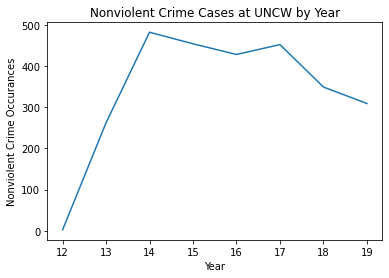

In [37]:
plotting1(nonviolent_crimes_df, nonviolent_crimes)

Show the number of nonviolent cases in this dataset. It is okay if you have a different number.

In [44]:
# total number of nonviolent cases
nonviolent_crimes_df['Type'].count()

2727

This dataset is hand-typed by campus police officers; therefore, there are a lot of issues/mistakes. Let's not blame them - their job is to keep students/staff safe and not to produce a good dataset!